In [1]:
import numpy as np
from scipy.fft import dctn, idctn
import matplotlib.pyplot as plt
import pymust, pymust.smoothn

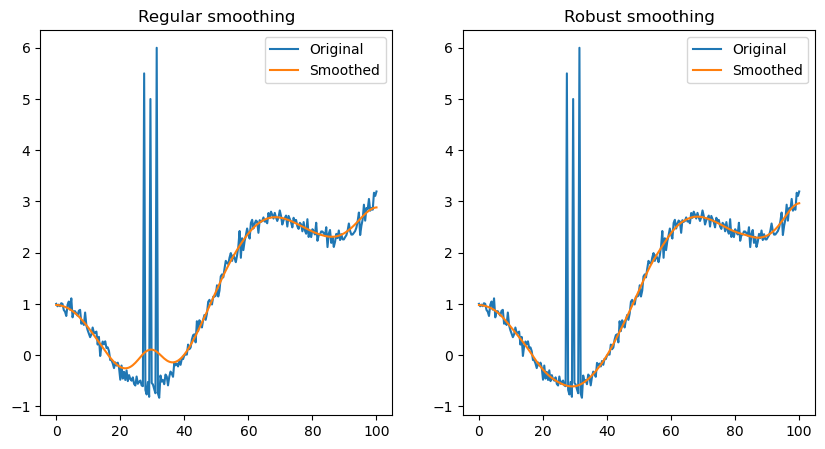

In [2]:
#--- Example #1: smooth a curve ---
x = np.linspace(0,100,2**8);
y = np.cos(x/10)+(x/50)**2 + np.random.randn(*x.shape)/10;
y[[70,75,80]] = [5.5, 5, 6];
z, _, _ = pymust.smoothn.smoothn(y); # Regular smoothing
zr, _, _ = pymust.smoothn.smoothn(y, isrobust = True); # Robust smoothing
_, (f1, f2) = plt.subplots(ncols = 2, figsize = (10,5))
plt.sca(f1)
plt.title('Regular smoothing')
plt.plot(x, y, label = 'Original')
plt.plot(x, z.flatten(), label = 'Smoothed')
plt.legend()
plt.sca(f2)
plt.title('Robust smoothing')
plt.plot(x, y, label = 'Original')
plt.plot(x, zr.flatten(), label = 'Smoothed')
plt.legend()

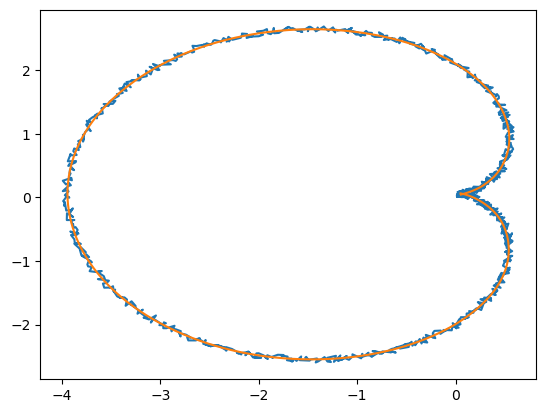

In [8]:
#   --- Example #5: smooth a cardioid ---
t = np.linspace(0,2*np.pi,1000)
x = 2*np.cos(t)*(1-np.cos(t)) + np.random.rand(*t.shape)*0.1;
y = 2*np.sin(t)*(1-np.cos(t)) + np.random.rand(*t.shape)*0.1;
z, _, _ = pymust.smoothn.smoothn([x,y]);
plt.plot(x,y)
plt.plot(z[0], z[1])

In [9]:
#--- Example #7: smooth a 2-D vector field ---
x,y = np.meshgrid(np.linspace(0,1,24), np.linspace(0,1,24));
Vx = np.cos(2*np.pi*x+np.pi/2)*np.cos(2*np.pi*y);
Vy = np.sin(2*np.pi*x+np.pi/2)*np.sin(2*np.pi*y);
Vx = Vx + np.sqrt(0.05)*np.random.rand(24,24); # adding Gaussian noise
Vy = Vy + np.sqrt(0.05)*np.random.rand(24,24); # adding Gaussian noise
I = np.random.permutation(Vx.size)
for i in range(0,30):
    ii = np.random.randint(0,24);
    jj = np.random.randint(0,24);
    Vx[ii, jj] = (np.random.rand()-0.5)*5; # adding outliers
    Vy[ii, jj]= (np.random.rand()-0.5)*5; # adding outliers
    ii = np.random.randint(0,24);
    jj = np.random.randint(0,24);
    Vx[ii, jj] = np.nan #NaN;   missing values
    Vy[ii, jj]=np.nan #NaN;   missing values


Text(0.5, 1.0, 'Non robust')

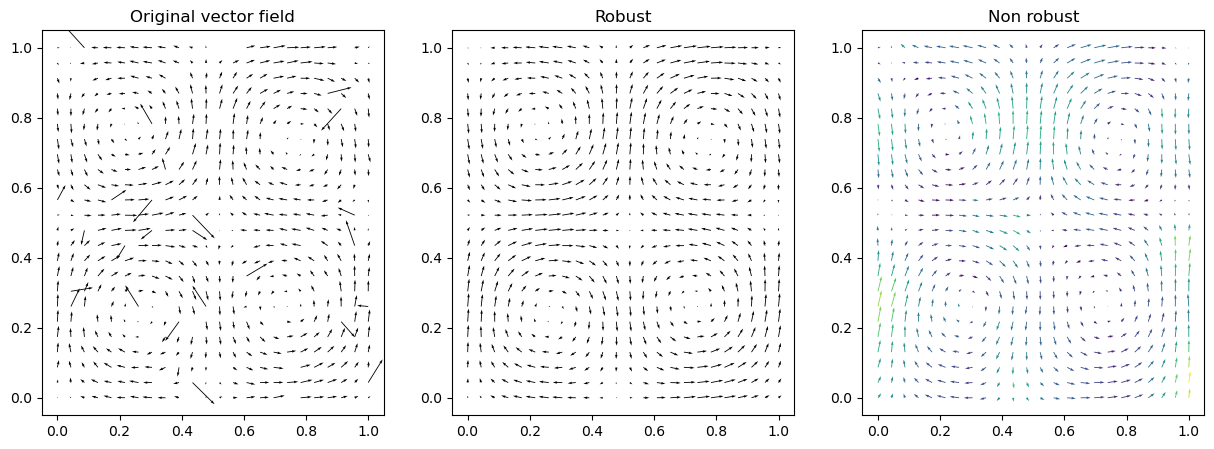

In [10]:
_, (f1, f2,f3) = plt.subplots(ncols = 3, figsize = (15,5))
plt.sca(f1)
plt.quiver(x,y,Vx,Vy)
plt.title('Original vector field')

plt.sca(f2)
Vs_rob, s, its = pymust.smoothn.smoothn([Vx,Vy], isrobust = True); 
plt.quiver(x,y,Vs_rob[0],Vs_rob[1])
plt.title('Robust')

plt.sca(f3)
Vs, _, _ = pymust.smoothn.smoothn([Vx,Vy],  isrobust = False); 
plt.quiver(x,y,Vs[0],Vs[1], np.linalg.norm(Vs_rob - Vs, axis = 0))
plt.title('Non robust')



In [11]:
import scipy

In [19]:
D = scipy.sparse.eye(10). 

In [20]:
D[0,0] = 1